# HW1

By:
1. Roni Roitbord (313575599)
2. Lior Yaacov Ben Ezra (209145101)



### 1. Quantization

In [1]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np

#import libraries 
import imageio
import os
import cv2
from skimage import io, color
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

Saving Drillocato.jpg to Drillocato.jpg


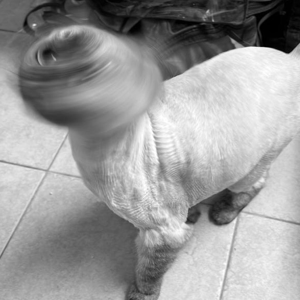

In [2]:
from google.colab import files
uploaded = files.upload()
og_image = Image.open("Drillocato.jpg")
gray_image = ImageOps.grayscale(og_image)
gray_image = gray_image.resize((300,300))
display(gray_image)

### 1:
We would like to estimate the probability density function (pdf) of the gray levels
in the image using the image histogram. If the histogram seems too uniform, please
pick another image with a non-uniform distribution.

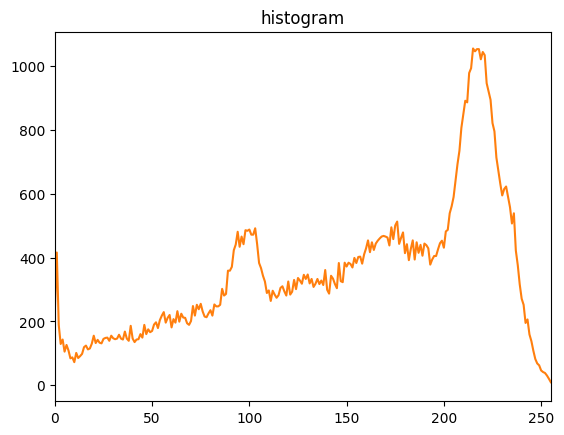

In [3]:
def calc_greyscale_hist(image):
    plt.plot(1,2)
    hist,bin = np.histogram(image,256,[0,255])
    plt.xlim([0,255])
    plt.plot(hist)
    plt.title('histogram')
    plt.show()

calc_greyscale_hist(gray_image)

We can see that the histogram does not represents a uniform distribution.

### 2:
 Apply uniform quantization on the image using b bits per pixel.
    a. Show the MSE as a function of the bit-budget b for b = 1, ..., 8.
    b. Plot the decision and representation levels for representative b values.

In [4]:
def uniform_quntizer(image, bit):
    delta = (image.max() - image.min())/(2**b)
    quantized_array = gray_image_array.min() + (np.floor((gray_image_array - gray_image_array.min())/delta)+0.5)*delta
    return quantized_array

uni_quantizer = np.vectorize(quntize)
quantized_vec = uni_quantizer(gray_image)
# print(quantized_vec)

NameError: ignored

### 3:

Implement the Max-Lloyd algorithm. This should be a function taking as input
a histogram pdf, a vector of initial decision levels, and a small value ε > 0 for
convergence tolerance. The function should return the converged decision levels and
the converged representation levels. In order to handle numerical approximations,
we use ε as a stopping condition: when the MSE improves by less than ε we stop the
algorithm.

In [5]:
'''
Q3.2 L^p algorithm implementation
gray_image = original image
intervals = number of intervals w.r.t 1 axis = N
delta - a precision threshold
'''
def lp_solver(gray_image, intervals, p, epsilon, delta):
  sampled_image = np.zeros((intervals,intervals), dtype=np.float64)
  scale = gray_image.shape[0]//intervals
  #initially the sampling is all zeros so there is no need to absolute value - because the values of the grey image are positive 
  prev_lp_error =  np.mean((gray_image)**p)
  #while error is bigger than the delta threshold
  while True :
    total_lp_error = 0
    
    for i in range(0 , intervals) : 
      for j in range(0 , intervals) : 
        temp1 = np.array(1/epsilon, dtype=np.float64)
        temp2 = (np.abs(gray_image[i*scale:(i+1)*scale,j*scale:(j+1)*scale]-sampled_image[i][j]))**(p-2)
        #we defined w(x) tilda to be the min of 1/epsilon and the w(x)
        weight_function = np.minimum(temp1, temp2)
        weighted_interval = gray_image[i*scale:(i+1)*scale,j*scale:(j+1)*scale]*weight_function
        if (np.sum(weight_function) == 0) :
          sampled_image[i][j]=0
        else:
          #integral of f(x)*w(x) divided by integral of w(x)
          sampled_image[i][j] = np.sum(weighted_interval)/(np.sum(weight_function))
        total_lp_error += np.sum((np.abs(gray_image[i*scale:(i+1)*scale,j*scale:(j+1)*scale]-sampled_image[i][j]))**p)
    
    curr_lp_error = total_lp_error/gray_image.size
    if(np.abs(curr_lp_error - prev_lp_error) < delta):
      return sampled_image, curr_lp_error
    
    prev_lp_error = curr_lp_error

In [6]:
def l1_solver(grey_image,intervals):
  sampled_image = np.zeros((intervals,intervals), dtype=np.float64)
  scale = gray_image.shape[0]//intervals
  total_l1_error = 0

  for i in range(0 , intervals) : 
      for j in range(0 , intervals) :
        #we have seen that the optimal values for p=1 is achieved by median over the function in the interval
        sampled_image[i][j] = np.median(grey_image[i*scale:(i+1)*scale,:i*scale:(i+1)*scale])
        total_l1_error += np.sum((np.abs(gray_image[i*scale:(i+1)*scale,j*scale:(j+1)*scale]-sampled_image[i][j])))

  total_l1_error = total_l1_error/grey_image.size
  return sampled_image , total_l1_error